In the previous notebook you simulated the Dubin's Car model by choosing random steering angles. Typically there is a target location the vehicle is progressing to, thus choosing control inputs that which move closer to the target would be ideal.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plt.rcParams['figure.figsize'] = 12, 12

Dubin's car simulation from the previous notebook.

In [52]:
def simulate(state, angle, v, dt):
    x = state[0]
    y = state[1]
    theta = state[2]    
    
    nx = x + v*np.cos(theta)*dt
    ny = y + v*np.sin(theta)*dt
    ntheta = theta + np.tan(angle)*dt
    dist = np.linalg.norm(np.array(goal[:2]) - np.array(state[:2]))
    
    return [nx, ny, ntheta, dist, v, angle]

Implement the `steer` function which returns controls inputs that progress `x1` to `x2`. You should return the steering angle and velocity. Remember constraints!

In [93]:
# limit the steering angle range
MAX_STEERING_ANGLE = np.deg2rad(30)
# km/h
MAX_VELOCITY = 1

def steer(x1, x2, t):
    theta = x1[2]
    
    # assumes theta is 0
    angle = np.arctan((np.arctan2(x2[1] - x1[1], x2[0] - x1[0]) - theta)/dt)
    angle = np.clip(angle, -MAX_STEERING_ANGLE, MAX_STEERING_ANGLE)
    
    v = np.linalg.norm(np.array(x1[:2]) - np.array(x2[:2]))/(total_time - t)
    v = np.clip(v, 0, MAX_VELOCITY)
    
    # print(total_time - t, v)
                
    return [angle, v]

Initially, we place the car at the center of the coordinate system (0, 0) and give heading of $0$ which is facing in the positive direction along the $x$ axis.

In [117]:
# feel free to play around with these
dt = 1
total_time = 20

# initial state
start = [0, 0, 0, 0, 0, 0]

# the goal location, feel free to change this ...
goal = [10, -15, 0, 0, 0, 0]
states = [start]

for i in np.arange(0, total_time, dt):
    current_state = states[-1]
    angle, velocity = steer(current_state, goal, i)
    state = simulate(current_state, angle, velocity, dt)
    states.append(state)

states = np.array(states)

Now let's visualize the path! It should be a smooth path from the start location to the goal location.

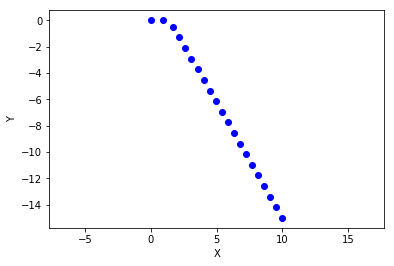

In [118]:
plt.scatter(states[:, 0], states[:, 1], color='blue')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [73]:
MAX_STEERING_ANGLE = np.deg2rad(30)
MAX_STEERING_ANGLE

0.5235987755982988

In [78]:
x = np.linspace(-MAX_STEERING_ANGLE, MAX_STEERING_ANGLE, 50)
y = np.tan(x)

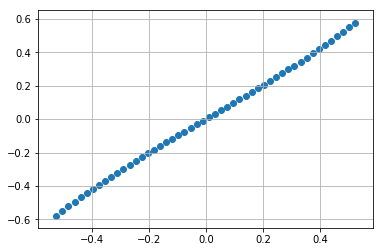

In [82]:
plt.scatter(x,y)
plt.grid()